## DSC 540: Week 9&10 Exercises
## DATE : JUL-24-2022

## Activity 9

In [1]:
## 1. Import the necessary libraries, including regex and beautifulsoup.
import urllib.request, urllib.parse, urllib.error

import requests

from bs4 import BeautifulSoup

import ssl

import re

In [2]:
## 2. Check SSl certificate
## Ignore SSL certificate errors

ctx = ssl.create_default_context()

ctx.check_hostname = False

ctx.verify_mode = ssl.CERT_NONE

In [3]:
## 3. Read HTML from the URL and pass on to BeautifulSoup

top100url = 'https://www.gutenberg.org/browse/scores/top'

response = requests.get(top100url)

In [4]:
## 4. Write a small function to check the status of the web request.
def status_check(res):
    if res.status_code==200:
        print('Success!')
        return 1
    else:
        print('Failed!')
        return -1

In [5]:
## 4. check status response, its success from the result.
status_check(response)


Success!


1

In [6]:
## 5. Decode response and pass to beautifulsoup for HTML parsing.

contents_resp = response.content.decode(response.encoding)

soup_contents = BeautifulSoup(contents_resp, 'html.parser')

In [7]:
## 6. Find all the href tags and store them in the list of links. 
## Check what the list looks like – print the first 30 elements.

list_links=[]

## Find all the href tags and store them in the list of links

for link in soup_contents.find_all('a'):
    list_links.append(link.get('href'))
## print all the links
list_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [8]:
## 7,8. Use a regular expression to find the numeric digits in these links. 
## These are the file numbers for the top 100 eBooks.
booknum=[]
for i in range(19,119):
    link=list_links[i]
    link=link.strip()
## Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

## Printing the file numbers
print ('\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n'+'-'*70)

## print the numbers
print(booknum)




The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 4300, 1661, 11, 33283, 105, 2701, 68639, 345, 174, 1184, 98, 68641, 84, 68642, 2600, 2554, 2591, 5200, 6130, 1952, 30254, 64317, 1400, 768, 1260, 45, 1080, 4980, 38600, 68640, 32449, 76, 74, 1232, 120, 158, 27827, 58585, 514, 844, 1399, 28054, 996, 135, 35, 4363, 5740, 43, 2680, 46, 1497, 67098, 43453, 205, 16, 161, 25717, 219, 3206, 244, 10, 31284, 36, 68636, 27107, 55, 8492, 68638, 2852, 766, 2848, 2542, 2814, 730, 41, 68646, 863, 408, 1998, 8800, 236, 10007, 1727, 113, 68650]


In [9]:
## 9. What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not
## print the whole thing, as it is too long).
print(soup_contents.text[:2000])

if (top != self):
    top.location.replace("http://www.gutenberg.org")
    alert('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here,make them give you your money back!')






Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-07-30166339
last 7 days1089191
last 30 days4465455



Top 100 EBooks yesterd

NameError: name 'top' is not defined

In [10]:
## 10,11,12,13. Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks
## (yesterday's ranking).

list_titles_temp=[]
start_idx=soup_contents.text.splitlines().index('Top 100 EBooks yesterday')
for i in range(100):
    list_titles_temp.append(soup_contents.text.splitlines()[start_idx+9+i])

list_titles=[]

for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',list_titles_temp[i]).span()
    list_titles.append(list_titles_temp[i][id1:id2])

for l in list_titles:
    print(l)


Pride and Prejudice by Jane Austen 
Ulysses by James Joyce 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Alice
Calculus Made Easy by Silvanus P
Persuasion by Jane Austen 
Moby Dick
Poems we all love by Various Various 
Dracula by Bram Stoker 
The Picture of Dorian Gray by Oscar Wilde 
The Count of Monte Cristo
A Tale of Two Cities by Charles Dickens 
The descent of the Sun
Frankenstein
The little white gate by Florence Hoatson 
War and Peace by graf Leo Tolstoy 
Crime and Punishment by Fyodor Dostoyevsky 
Grimms
Metamorphosis by Franz Kafka 
The Iliad by Homer 
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Romance of Lust
The Great Gatsby by F
Great Expectations by Charles Dickens 
Wuthering Heights by Emily Bront
Jane Eyre
Anne of Green Gables by L
A Modest Proposal by Jonathan Swift 
Old Granny Fox by Thornton W
The World
The Chutney lyrics
Japanese Girls and Women by Alice Mabel Bacon 
Adventures of Huckleberry Finn by Mark Twain 
The Adventures of Tom Sawyer
Th

## Activity 10

In [11]:
## import required modules
import urllib.request, urllib.parse, urllib.error

import json

In [12]:
# Load the secret API key, create APIkey.jspn file with the key obtained fromm omdb url.
with open('APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

## assigning the url
serviceurl = 'http://www.omdbapi.com/?'

## creating a variable called apikey
apikey = '&apikey='+omdbapi

In [13]:
# Writing a utility function called print_json to print the movie data from a JSON file

def print_json(json_file):
    #List of the categories in the JSON files returned by the OMDb API
    json_categories = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 
                 'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    
    #Iterating over the list to print each category followed by its value from the JSON file
    for k in json_categories:
        print(f'{k} : {json_file[k]}')

In [14]:
import os

#Function to download the poster
def download_poster(json_file):
    #Pulling the movie title and poster link from the JSON file
    title = str(json_file['Title'])
    poster_link = json_file['Poster']
    
    #Reading the poster image data by passing the poster link through the urllib.request library
    poster = UR.urlopen(poster_link).read()
    
    #Defining the image file's save location in the current working directory
    save_location = os.getcwd() + '\\'
    
    #Getting the file extension from the poster URL by grabbing the last value from the URL split by its dots
    #Usually images will end in '.JPEG' or '.PNG' so the last set of characters after the last dot should be the extension.
    poster_file_extension = poster_link.split('.')[-1]
    
    #If the file extension is one of the most common image extensions, the file will be downloaded
    if poster_file_extension.upper() == 'JPEG' or poster_file_extension.upper() == 'JPG' or poster_file_extension.upper() == 'PNG':
        #Defining what the saved file will be named
        filename = '{}{}{}{}'.format(save_location, title, '.', poster_file_extension)

        #Opening a brand new file, writing the image data to it, then closing it
        with open(filename,'wb') as f:
            f.write(poster)
            f.close()

In [15]:
## utility function for searching
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of {title} now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie

        if json_data['Poster']!='N/A':
            save_poster(json_data)
        else:
            print('Error encountered: ',json_data['Error'])

    except urllib.error.URLError as e:
        print(f'ERROR: {e.reason}')

In [16]:
#Writing a function to display the downloaded poster directly in Jupyter Notebook.

def show_image(movie_name):
    try:
        from IPython.display import Image, display
        display(Image(filename = '{}.jpg'.format(movie_name)))
    except:
        print('ERROR!')

In [17]:

#Testing the functions on the movie Titanic
titanic = 'Titanic'
search_movie(titanic)
show_image(titanic)
print(' ')

#Testing to see if an error occurs
#search_movie('No Movie Found')
show_image('No Movie Found')

Retrieving the data of Titanic now... 
http://www.omdbapi.com/?t=Titanic&apikey=c8797fd9
Title : Titanic
Year : 1997
Rated : PG-13
Released : 19 Dec 1997
Runtime : 194 min
Genre : Drama, Romance
Director : James Cameron
Writer : James Cameron
Actors : Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot : A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language : English, Swedish, Italian, French
Country : United States
Awards : Won 11 Oscars. 125 wins & 83 nominations total
Ratings : [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore : 75
imdbRating : 7.9
imdbVotes : 1,147,994
imdbID : tt0120338


NameError: name 'save_poster' is not defined

# TASK-3

In [3]:
pip install python-twitter

  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


In [34]:
import twitter
api = twitter.Api(consumer_key='eItVn2dtLIdgqTCrEAnhMiqj5',
  consumer_secret='AIJA07AAgzjKvhFnBRsw6obX2ffvJR9z6GrGao0uehmBUHw2mC',
    access_token_key='1417488597683482624-PGms7rg6q3KU24BkrJm0WlfFBN63z4',
    access_token_secret='NFdrBAAanRmrAddNKQAfcD7ygc4Yv5zYVBaSM9tUW1Ubx')

In [35]:
print(api.VerifyCredentials())

{"created_at": "Tue Jul 20 14:16:46 +0000 2021", "default_profile": true, "default_profile_image": true, "favourites_count": 7, "followers_count": 1, "friends_count": 23, "id": 1417488597683482624, "id_str": "1417488597683482624", "listed_count": 4, "name": "AB1285", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "AB12851", "status": {"created_at": "Mon Jan 03 01:44:17 +0000 2022", "id": 1477818063336714242, "id_str": "1477818063336714242", "in_reply_to_screen_name": "bag_hunters", "in_reply_to_status_id": 1435908125815558149, "in_reply_to_user_id": 3248940135, "lang": "en", "source": "<a hre

In [36]:
## Downlaoded user time line
statuses = api.GetUserTimeline(screen_name='@BellevueU')
print([s.text for s in statuses])

['A bachelor’s and two master’s degrees from Bellevue University — Jeremy is crushing it! #goals https://t.co/AmB3Ba9wQu', 'Disabilities aren’t always visible. #DisabilityIndependenceDay https://t.co/replXv3ZDd', 'This week on Tuesday Take•Aways...\nInsights From Being the Weakest Link on Your Team!  🤔\nTune in EVERY Tuesday at 1… https://t.co/yuW24cdtQB', "To my professors: THANK YOU! You've made my experience at Bellevue University an awesome one.\n\nFrom: Ryan Avery\n\nGi… https://t.co/9P3ML1kEtU", 'This week on Tuesday Take•Aways...\nInsights from feeling unhealthy. 🙃\nTune in EVERY Tuesday at 11 AM CST for Tuesda… https://t.co/SQyYIfKGpa', "It's more than just earning the grade, it's about learning the content to use in your professional and personal lif… https://t.co/4cZw3eTVN5", "Bellevue University is proud to be part of Guild Education's academic network and support students like Del Carpio… https://t.co/XW099Wy3qw", 'This week on Tuesday Take•Aways...\nInsights from feeling s

In [37]:
# users/followers -- 
followers = api.GetFollowers(total_count=100)
print([f.name for f in followers])

['Tess (ONE & ONLY)']


In [38]:
users = api.GetFriends(screen_name='@BellevueU')
print([u.name for u in users])

['Emily', 'USL Championship', 'Alyson Stoner', 'USL League One', 'United Soccer League', 'U.S. Office of Personnel Management', 'Air & Space Forces Association', 'CyberPatriot', 'Trish Siedlik', 'mattburns963', 'Renee Burns', 'John Panaghi', 'AC', 'Shannon Story', 'Kirk Nelson', 'Brian Bristlin', 'YellowFS ⬆️', 'SFCC', 'NSA/CSS', 'Homeland Security', 'Martie J. Cordaro', 'Misty Sidel', 'Hùng Leoteo', 'Stephen Ghostley', 'CCAC Student Life and Engagement', 'CCAC Community College of Allegheny County', 'kayc', 'wdwmom', 'Bellevue Chamber of Commerce', 'Hawkins Construction Company', 'Hy-Vee Smiles', 'Randy Essex', 'Mark Heath-Preston', 'Karl W. White 🌻', 'Tarrant Area Food Bank', 'TarrantCountyCollege', 'InEight', 'Kevin Melcher', 'Pamela Jean Mass', 'Shawn Sigala', 'Kayla Kaye 🏁', 'Ashley Weiss', 'CLO Exchange', 'John (Wears a 😷) Rokes', 'Nataliia Berezhna, PMP', 'Walters State', 'Ronnie', 'Sara Fishbane (Weaver)', 'Bailey R Blanchard', 'ash💛', 'kris hennings', 'madison machacek', 'Mark

## Exercise 4

In [27]:
## load packages
import pandas as pd
import seaborn as sns

In [28]:
## import cars data set and read the csv file.
carPriceData = pd.read_csv('/Users/Jagadeesh/Desktop/SAI_MS/540/week7_8/CarPrice.csv') 
carPriceData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:xlabel='wheelbase', ylabel='enginesize'>

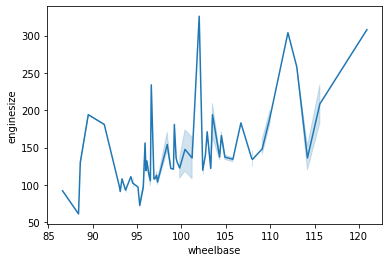

In [29]:
## line chart with x-axis :wheelbase and Y-axis : enginesize
sns.lineplot(data=carPriceData, x="wheelbase", y="enginesize")

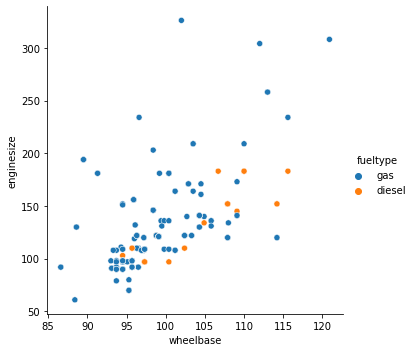

In [30]:
## scatter plot with x-axis :wheelbase and Y-axis : enginesize and hue : fueltype
sns.relplot(data=carPriceData, x='wheelbase', y='enginesize',
hue='fueltype')

<AxesSubplot:xlabel='wheelbase', ylabel='carbody'>

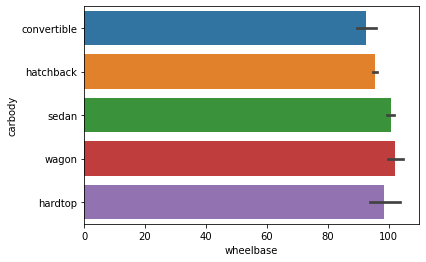

In [31]:
## bar chart with x axis as wheelbase and y axis as carbody
sns.barplot(x="wheelbase", y="carbody", data=carPriceData)

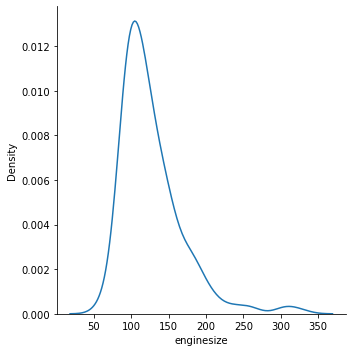

In [32]:
## Density plotx='enginesize', kind='kde'
sns.displot(data=carPriceData, x='enginesize', kind='kde')

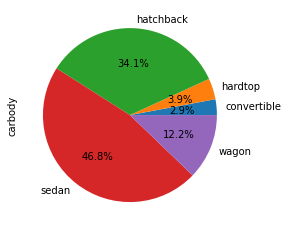

In [33]:
## pie chart
data = carPriceData.groupby("carbody")["carbody"].count()
data.plot.pie(autopct="%.1f%%");
